In [1]:
# Clustering

# Question 2.1 Implement the basic 𝐾-Means algorithm.

In [3]:
import numpy as np
def my_kmeans(xs: np.ndarray, init_centers: np.ndarray, n_iter: int):
    """ Runs the K-Means algorithm from a given initialization
    
    Args:
        xs: A 2D numpy array of shape (N, D) containing N samples of dimension D
        init_centers: A 2D numpy array of shape (K, D) containing the K initial cluster centers of dimension D.
        n_iter: The number of iterations for the K-Means algorithm.
    
    Returns:
        A (K, D) numpy array containing the final cluster centers.
    """
    N , D = xs.shape
    
    clusters = np.empty(shape=(N))
    A = init_centers
    K = A.shape[0]
    
    #calculate new clusters
    
    for n in range(n_iter):
        # calculate and assign each data point to a centroid
        for i in range(N):
            min_dist = 0
            dist_array = np.zeros(shape =(K))
            for k in range(K):
               dist_array[k] = np.linalg.norm(xs[i]  - A[k])
            cluster = np.argmin(dist_array)

            clusters[i] = cluster
        # find new cluster centers by taking the mean of values assigned to the cluster
        for i in range(K):
            points_in_this_cluster = np.where(clusters == i)
            data_in_this_cluster = xs[points_in_this_cluster]
            mean_of_this_cluster = data_in_this_cluster.mean(axis=0)
            A[i] = mean_of_this_cluster
    return A
    
    # YOUR CODE HERE

In [4]:
# Use the following checks to make sure your algorithm produces centers of the correct shape and gives the correct result in the simplest case of 0 iterations

In [5]:
assert my_kmeans(
    np.array([[0.92222276, 0.65417794, 0.81171083], [0.32436396, 0.43398054, 0.06203346], [0.66190191, 0.51464817, 0.53506438], [0.52361743, 0.82799732, 0.99989914]]),
    np.array([[0.46606325, 0.30170084, 0.3454716], [0.09386854, 0.6876939 , 0.89328422]]),
    3
).shape == (2, 3), "Final cluster centers must have the same shape as the initial cluster centers"
assert np.allclose(my_kmeans(np.random.rand(10, 4), __initial_centers := np.random.rand(3, 4), 0), __initial_centers), "For 0 iterations, the final cluster centers must be identical to the initial cluster centers"

In [6]:
# Question 2.2 Generate random data from four gaussian distributions.

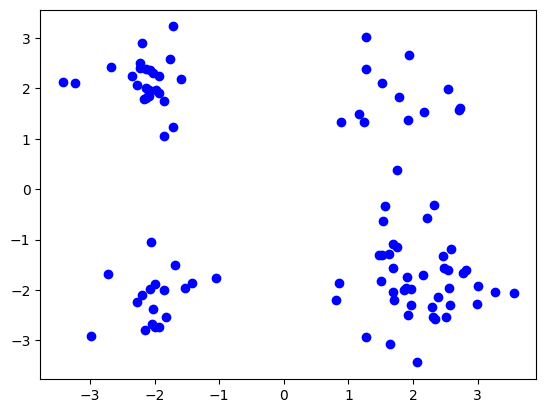

In [7]:
import matplotlib.pyplot as plt
# generate 4 gaussian distributions

g1 = np.random.multivariate_normal([-2,2],0.2 * np.identity(2),100)
g2 = np.random.multivariate_normal([-2,-2],0.2 * np.identity(2),100)
g3 = np.random.multivariate_normal([2,-2],0.5 * np.identity(2),100)
g4 = np.random.multivariate_normal([2,2],0.5 * np.identity(2),100)

g_total = np.stack([g1,g2,g3,g4], axis=0)

# pde for choice of data
pde = np.array([0.3,0.2,0.4,0.1])

#select 1 of the 4 distributions randomly
indices = np.random.choice([0,1,2,3],100,p=pde)

#use the indices to generate the data array
data = np.empty(shape=(100,2))

#indices
for i in range(100):
    data[i] = g_total[indices[i]][i] 

xs_cluster_test = data
plot_x = xs_cluster_test[:,0]
plot_y = xs_cluster_test[:,1]

plt.scatter(plot_x, plot_y,c="blue")
plt.show() 
# YOUR CODE HERE
#raise NotImplementedError()

In [8]:
# Use the following check to make sure your data has the correct shape

In [9]:
assert xs_cluster_test.shape == (100, 2), "You should get 100 2D data points"

In [10]:
# Question 2.3 Run your 𝐾-Means algorithm on the test data for 𝐾=2,3,4,5 clusters and plot the final cluster centers.

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus

def my_plot(xs: np.ndarray):
    """ Plots the K-Means result for different numbers of cluster given 2-dimensional data.
    
    Notes:
        Use the `kmeans_plusplus` function to get initial cluster centers.
    
    Args:
        xs: A 2D numpy array of shape (N, 2) containing N 2-dimensional samples.
    """
    
    plt.figure(figsize=(10, 10))
    n_clusters = [2, 3, 4, 5]  # different numbers of clusters
    
    # iterate over each cluster n in `n_clusters` with index i
    for i, n in enumerate(n_clusters):
        plt.subplot(2, 2, i + 1)
        init_centers, indices_ = kmeans_plusplus(xs, n_clusters = n , random_state=0)
        result  = my_kmeans(xs,init_centers,n)
        #plot data points
        plot_x = xs[:,0]
        plot_y = xs[:,1]
        plt.scatter(plot_x, plot_y,c="blue")
        #plot resulting cluster centers
        plot_resx = result[:,0]
        plot_resy = result[:,1]
        plt.scatter(plot_resx, plot_resy,c="red")

        # YOUR CODE HERE
        #raise NotImplementedError()

In [12]:
# Plot the data and the centers you get using your randomly generated data

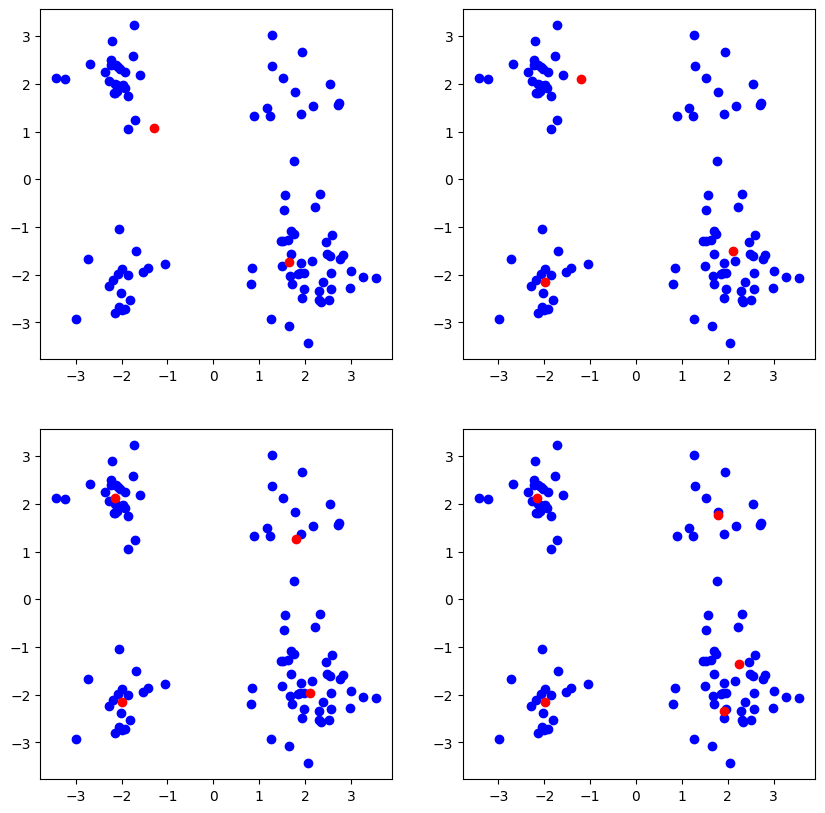

In [13]:
my_plot(xs_cluster_test)